<a href="https://colab.research.google.com/github/lydiandiba/Titanic-Survival-prediction-and-Email-spam-detection/blob/master/Titanic_Survival_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font color="green">*To start working on this notebook, or any other notebook that we will use in the Moringa Data Science Course, we will need to save our own copy of it. We can do this by clicking File > Save a Copy in Drive. We will then be able to make edits to our own copy of this notebook.*</font>

# Python Programming: Titanic survival Prediction Using KNN and Naive Bayes Classifier

## 1. Defining the Question

### a) Specifying the Data Analytic Question

> Predicting Survival of the passengers who were on board the titanic.

### b) Defining the Metric for Success

> Getting the best accuracy using Knn to predict survival

### c) Understanding the context 

> Titanic was a British passenger liner operated by the White Star Line that sank in the North Atlantic Ocean in the early morning hours of April 15, 1912, after striking an iceberg during her maiden voyage from Southampton to New York City. Of the estimated 2,224 passengers and crew aboard, more than 1,500 died, making the sinking one of modern history's deadliest peacetime commercial marine disasters.

### d) Recording the Experimental Design

> I will load and read the data, understand my data, clean the data by checking for and removing outliers, missing values and duplicates. I will then perform feature engineering and create my models to find the one with the highest accuracy. Finally, evaluate my models by challenging the solution and give my conclusion.

### e) Data Relevance

Survived - Survival (0 = No; 1 = Yes)

Pclass - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)

Name - Name

Sex - Sex

Age - Age

SibSp - Number of Siblings/Spouses Aboard

Parch - Number of Parents/Children Aboard

Ticket - Ticket Number

Fare - Passenger Fare (British pound)

Cabin - Cabin

Embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

## 2. Reading the Data

In [0]:
# Importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Improving visual appearance of graphs
sns.set(rc={'figure.figsize':(10, 8)})
# Ensure all columns are displayed
pd.pandas.set_option('display.max_columns', None)

# Hide warnings related to numpy 
import warnings
warnings.filterwarnings("ignore")

In [0]:
# Loading the Data 
#
titanic = pd.read_csv ("train.csv")

In [3]:
# Previewing the top of our dataset
#
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S




## 3. Checking the Data

In [4]:
# Determining the no. of records in our dataset
#
titanic.shape

(891, 12)

We have 891 records and 12 variables in our dataset.

In [5]:
# getting the statistical description of our data

titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
# Checking whether each column has an appropriate datatype
#
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## 5. Tidying the Dataset

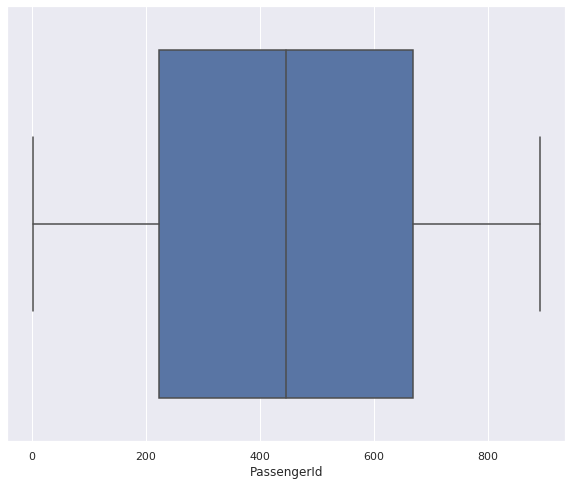

In [7]:
# Checking for Outliers
#
# passenger ID outliers
sns.boxplot(x= titanic['PassengerId'])

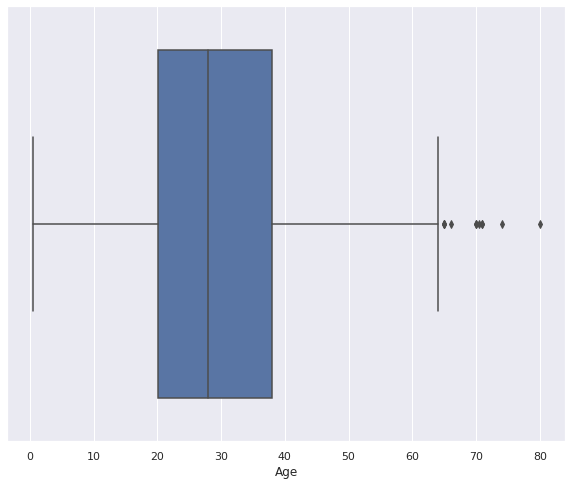

In [8]:
# Age outliers

sns.boxplot(x= titanic['Age'])

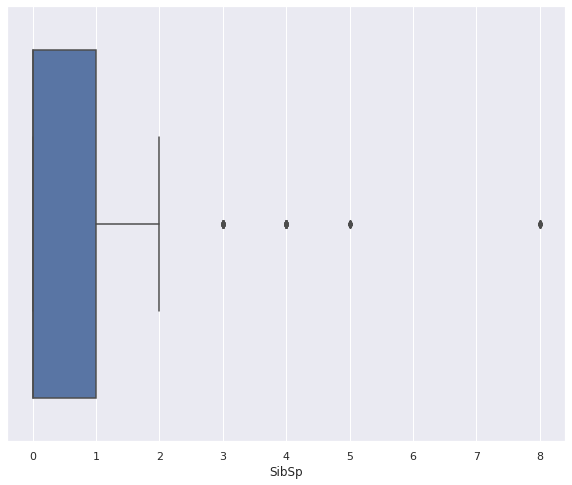

In [9]:
sns.boxplot(x= titanic['SibSp'])

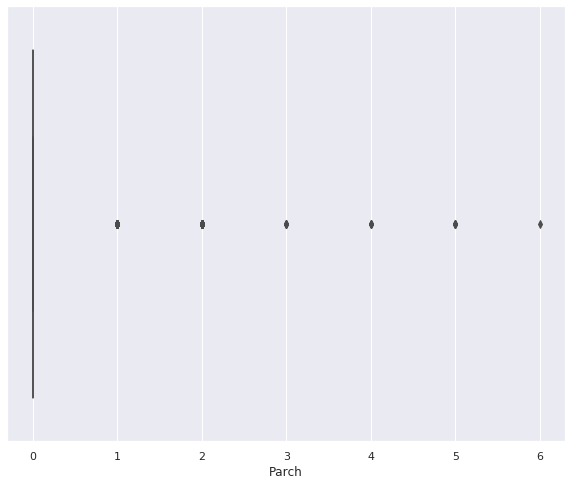

In [10]:
sns.boxplot(x= titanic['Parch'])

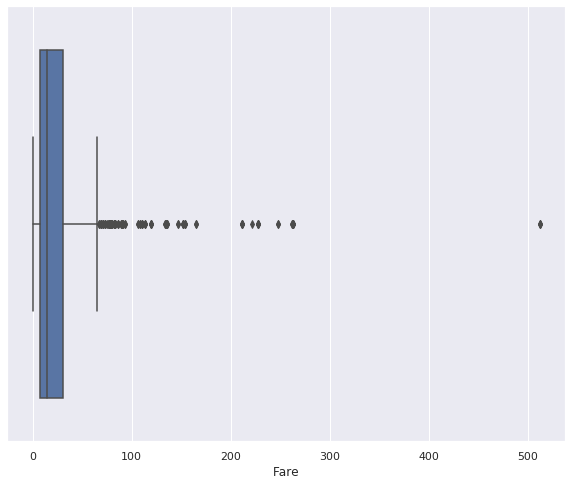

In [11]:
sns.boxplot(x= titanic['Fare'])

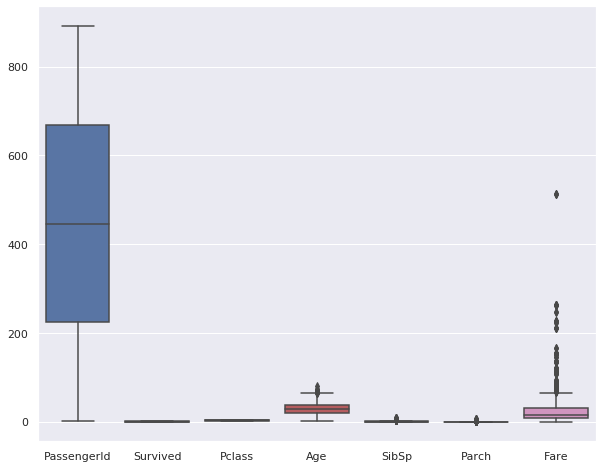

In [12]:
sns.boxplot(data = titanic)

Fare seems to be the variable with the most outliers. This could be a difference in the classes that brought about the big difference in fares paid.

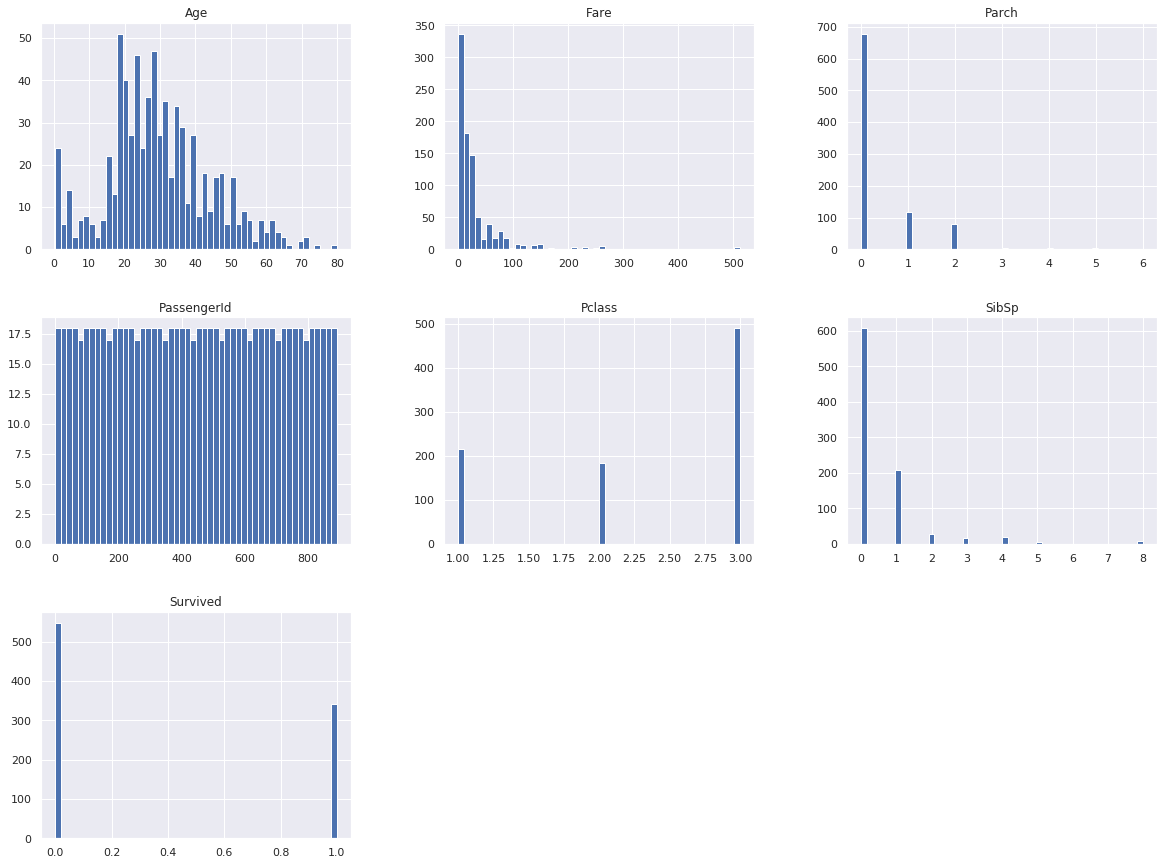

In [13]:
#Distribution plot
titanic.hist(bins=50,figsize=(20,15))
plt.show()

In [14]:
# Checking for duplicates
#
titanic.duplicated().any()

False

We do not have any duplicates.

In [15]:
# Identifying the Missing Data
#
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

We will not drop missing values as it is important to look at how the variables will affect our predictor variable.

## Dealing with the Missing Data

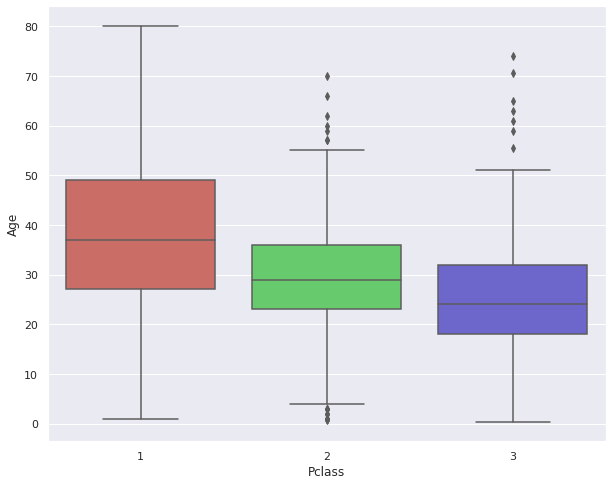

In [16]:
# Imputing missing values

# Let's look at how passenger age is related to their class as a passenger on the boat.
# 
sns.boxplot(x='Pclass', y='Age', data=titanic, palette='hls')

We could say that the younger a passenger is, the more likely it is for them to be in 3rd class. The older a passenger is, the more likely it is for them to be in 1st class. We will fill in the null values with the mean age per class as displayed by the box plot. The mean for 1st class passengers is about 37, 2nd class passengers is 29, and 3rd class pasengers is 24.

In [0]:
# We will write a function that finds each null value in the Age variable, and for each null, 
# checks the value of the Pclass and assigns an age value according to the average age of passengers in that class.
#
def age_approx(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [18]:
# When we apply the function and check again for null values, we see that there are no more null values in the age variable.
#
titanic['Age'] = titanic[['Age', 'Pclass']].apply(age_approx, axis=1)
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Since Embarked is a categorical variable, we will fill in the missing values with the mode.

In [19]:
# Getting the mode of the column Embarked

titanic.Embarked.mode()

0    S
dtype: object

In [0]:
# Filing in the missing values with S which is the mode

titanic['Embarked'].fillna( 'S' , inplace = True)

Since cabin has so many missing values, we shall go ahead and drop the whole column to avoid altering with the dataset.

In [0]:
# dropping the column cabin
titanic.drop (columns= 'Cabin', inplace = True)

Checking whether we have any missing values.


In [22]:
titanic.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Embarked       False
dtype: bool

Our columns dont have any missing values. 

In [0]:
# Dropping Unnecessary Columns

#We are going to drop some some of the columns that we do not need in training our model. The following columns will be dropped due to their high cardinality:

titanic.drop (columns = ['Name','PassengerId'], inplace = True)

In [24]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,female,35.0,1,0,113803,53.1000,S
4,0,3,male,35.0,0,0,373450,8.0500,S


In [0]:
# Manually encodding the sex and embarked columns

titanic['Sex'].replace(['male', 'female'],[0, 1],inplace=True)
titanic['Embarked'].replace(['S', 'C', 'Q'],[0, 1, 2],inplace=True)


In [26]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,0,22.0,1,0,A/5 21171,7.2500,0
1,1,1,1,38.0,1,0,PC 17599,71.2833,1
2,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,1,1,1,35.0,1,0,113803,53.1000,0
4,0,3,0,35.0,0,0,373450,8.0500,0


## 6. Exploratory Analysis

### Univariate Analysis

Text(0.5, 0, 'survival')

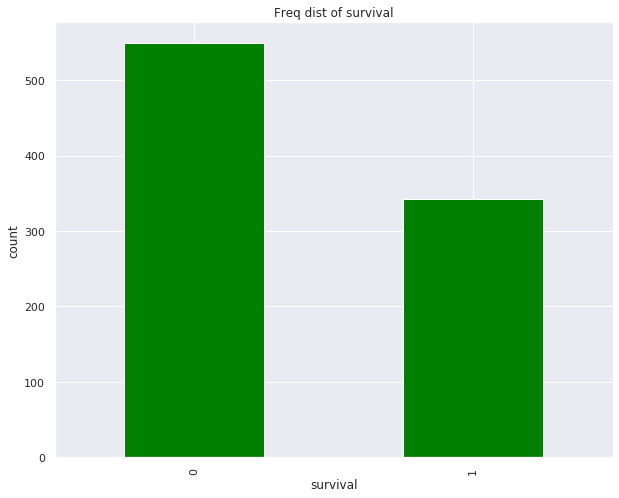

In [27]:
## checking the balance of the data by plotting the count of survival by their value

titanic['Survived'].value_counts().plot.bar(title='Freq dist of survival', color = 'green')
plt.ylabel('count')
plt.xlabel('survival')
#p=titanic.Survived.value_counts().plot(kind="bar")

549 people did not survive while 342 survived the titanic.

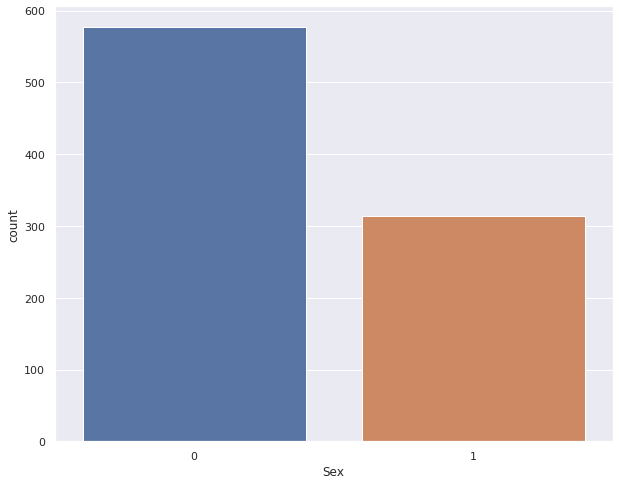

In [28]:
#Gender count.

sns.set(style="darkgrid")
sns.countplot(x="Sex", data=titanic)

There were more males than females on board the titanic.

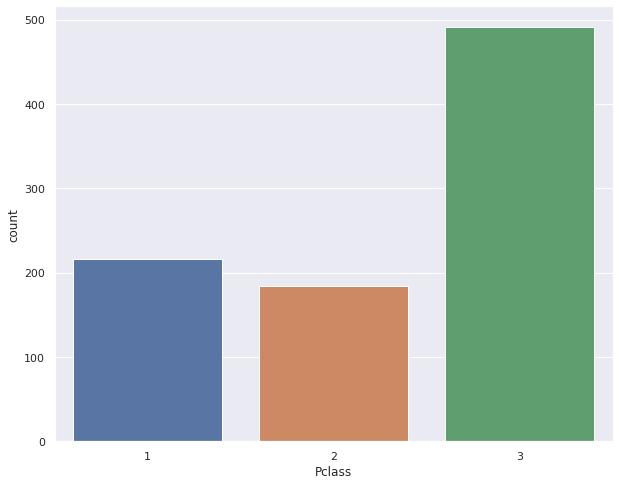

In [29]:
#Distribution of class.

sns.set(style="darkgrid")
sns.countplot(x="Pclass", data=titanic)

Class 3 had the highest number of passengers followed by class 1 then class 2.

### Bivariate Analysis

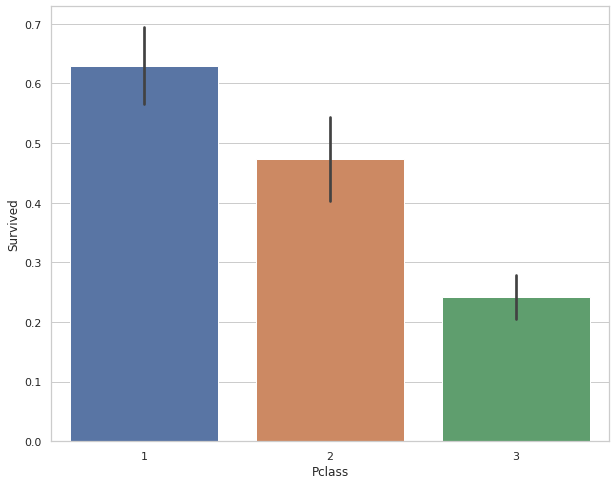

In [30]:
# Using a bar chart from seaborn
sns.set(style = 'whitegrid')
sns.barplot(x='Pclass', y='Survived', data=titanic)

Most survivers were in the 1st class followed by those in 2nd class then the passengers in 3rd class had the least survival rate.

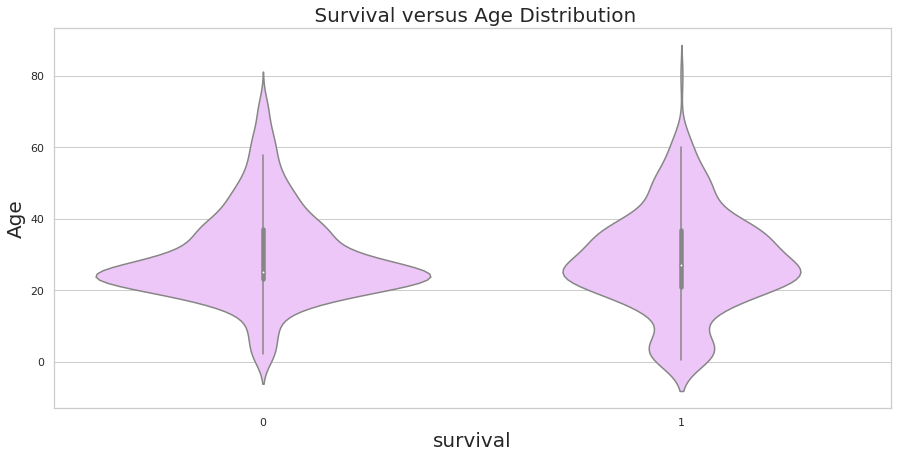

In [31]:
#Violin plot showing distribution of patients with hypothroid versus those without by age
plt.figure(figsize = (15,7))
sns.violinplot(x=titanic['Survived'], y=titanic['Age'], color='#F0BFFF')
plt.xticks([0,1])
plt.ylabel('Age',fontsize = 20)
plt.xlabel('survival',fontsize = 20)
plt.title(' Survival versus Age Distribution',fontsize = 20)
plt.show()


We can see that most passengers who did not survive were between the ages of 20 and 30.
Those who survived are concentrated around ages 17 and 40.

<function matplotlib.pyplot.show>

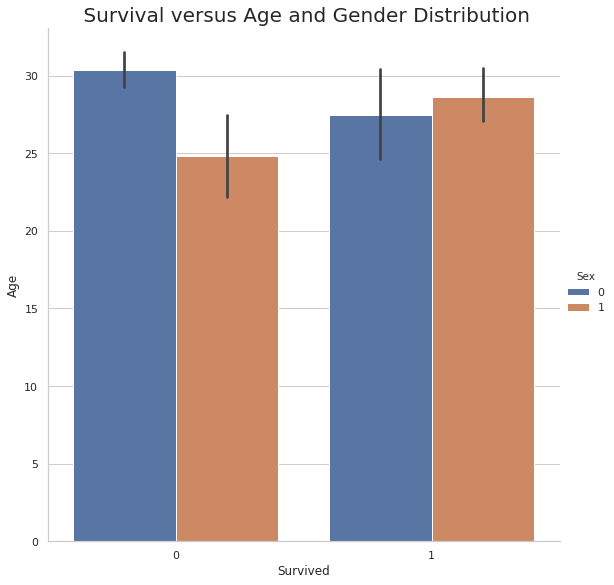

In [32]:
# Survival by age and gender

sns.factorplot(x='Survived', y='Age', hue="Sex" , kind="bar", data=titanic,size=8,aspect= 1);
plt.xticks([0,1])
plt.title(' Survival versus Age and Gender Distribution',fontsize = 20)
plt.show

We can see that from those who did not survive, the males were more than females.
But from the survived, the females were more than the males.

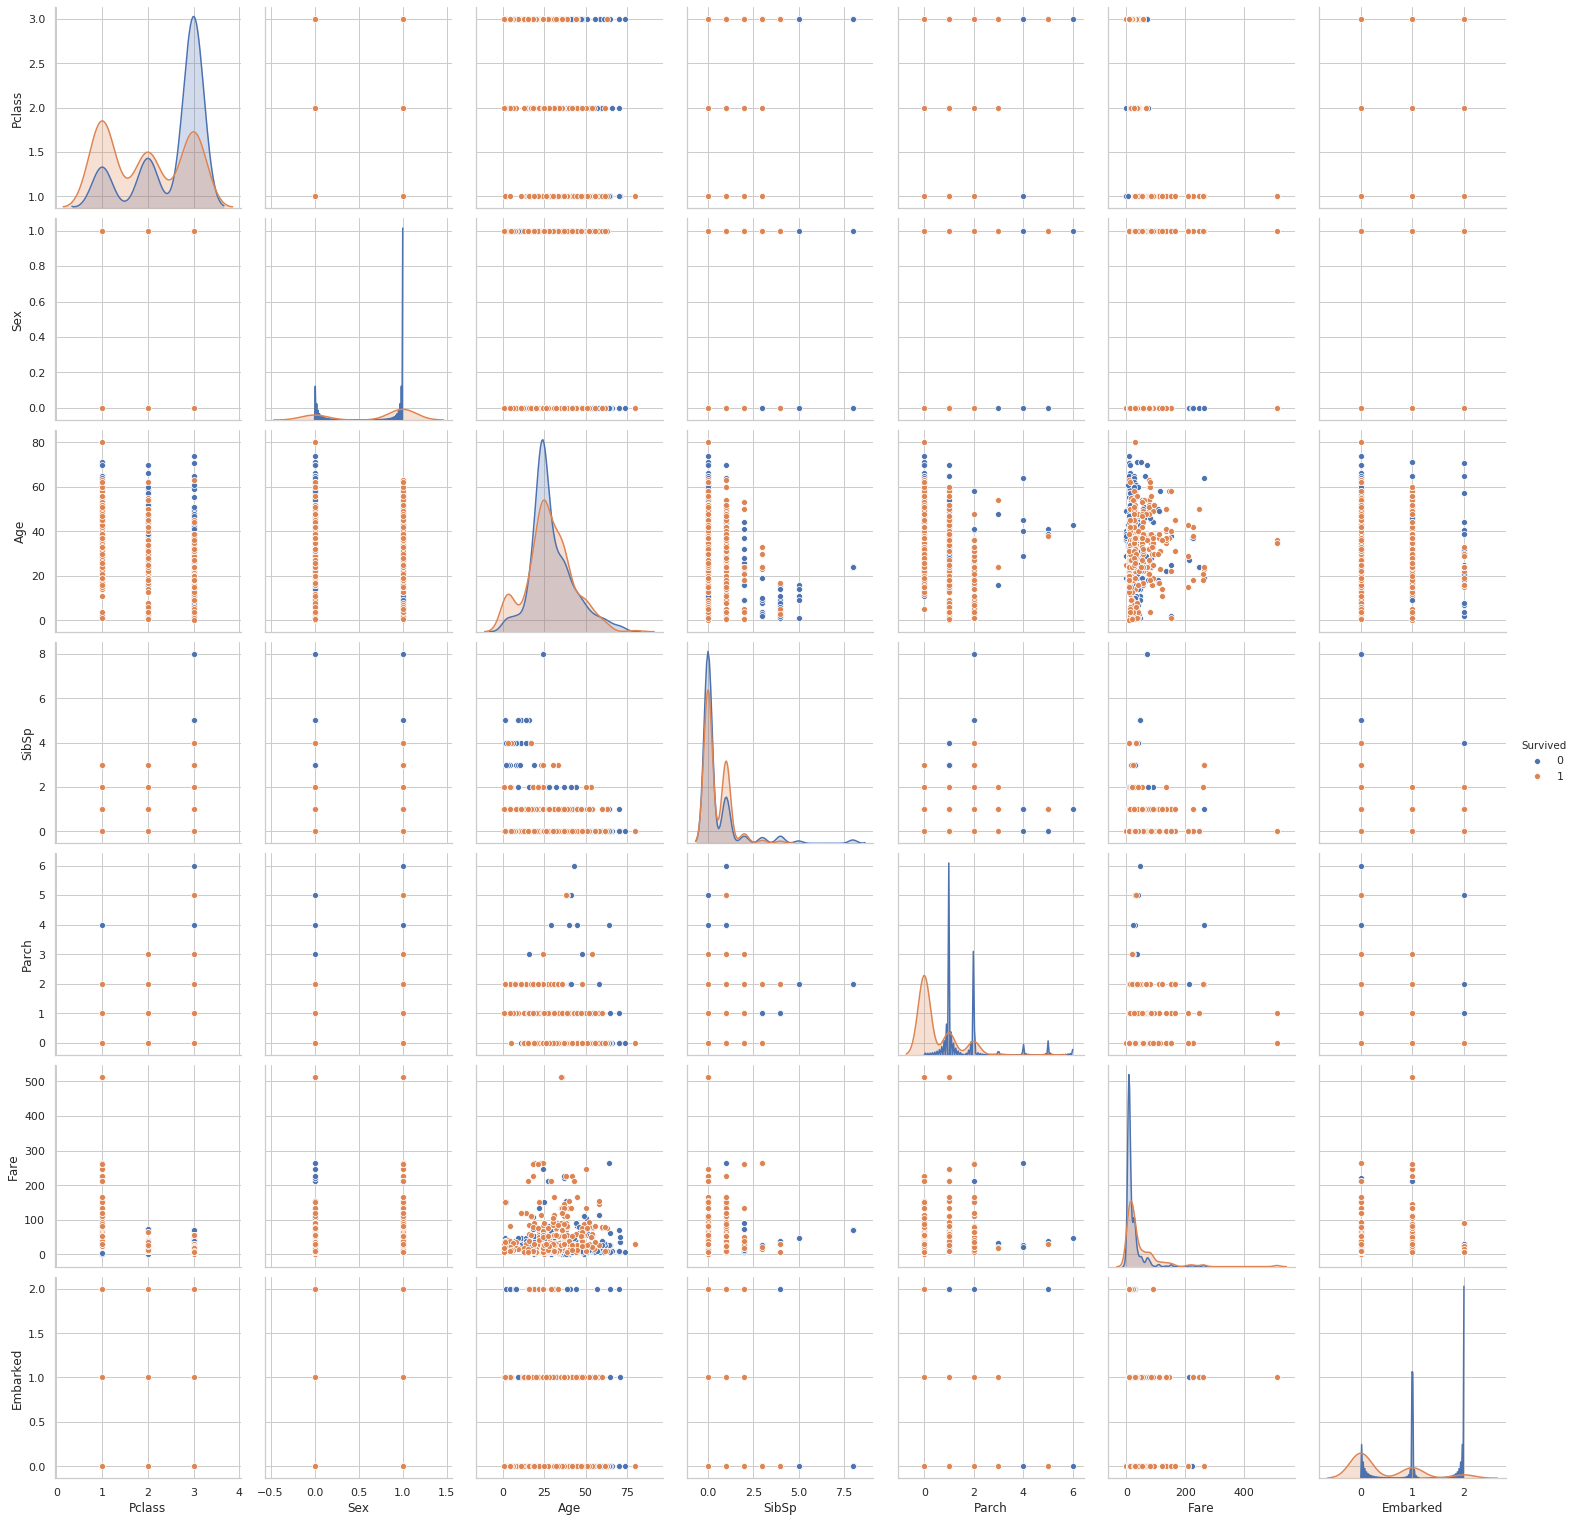

In [33]:
# Ploting the bivariate summaries and recording our observations
# 
sns.pairplot((titanic), hue="Survived", size=3)

Checking for correlation

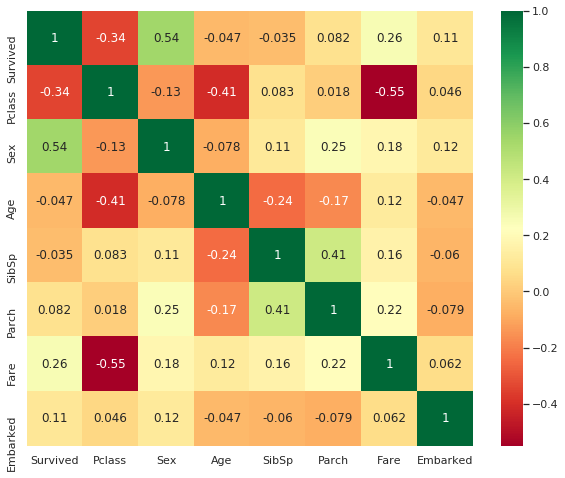

In [34]:
# Heatmap

sns.heatmap(titanic.corr(), annot=True,cmap ='RdYlGn')  

We can see some negative correlation between fare and Pclass at -0.55. 
There is some positive correlation between sex and survival at 0.54.

## 7. Implementing the Solution

## K Nearest Neighbors

### We will start off by splitting our Knn model by 80-20 on training.

In [35]:
#Splitting the data into test and train sets

X = titanic.drop(['Survived', 'Ticket', 'Fare'],axis=1)
y = titanic["Survived"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=10)

# Instantiating our model and setting k as 5

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)

# Training our model

classifier.fit(X_train, y_train)

# Making Predictions using our model 

y_pred = classifier.predict(X_test)

# Evaluating our model 

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred))

print(accuracy_score(y_pred,y_test))
#round(classifier.score(X_train, y_train) * 100, 1)


[[103  14]
 [ 20  42]]
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       117
           1       0.75      0.68      0.71        62

    accuracy                           0.81       179
   macro avg       0.79      0.78      0.79       179
weighted avg       0.81      0.81      0.81       179

0.8100558659217877


The above Knn model is done without scaling. We will now try scaling to see the effect it will have on accuracy.

In [36]:
#Splitting the data into test and train sets

X = titanic.drop(['Survived', 'Ticket', 'Fare'],axis=1)
y = titanic["Survived"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=10)

# Feature Scaling

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Instantiating our model and setting k as 5

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)

# Training our model

classifier.fit(X_train, y_train)

# Making Predictions using our model 

y_pred = classifier.predict(X_test)

# Evaluating our model 

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred))

print(accuracy_score(y_pred,y_test))


[[101  16]
 [ 17  45]]
              precision    recall  f1-score   support

           0       0.86      0.86      0.86       117
           1       0.74      0.73      0.73        62

    accuracy                           0.82       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.81      0.82      0.82       179

0.8156424581005587


Hyperparameter tuning to get our ultimate parameters

In [37]:
#Splitting the data into test and train sets

X = titanic.drop(['Survived', 'Ticket', 'Fare'],axis=1)
y = titanic["Survived"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=10)

# scaling our Data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


# Searching the best parameters using Rnadom Search
params = { 'n_neighbors' : range(1,20),
          'metric' : ['euclidean', 'manhattan', 'minkowski'],
          'weights': ['uniform', 'distance']}

# specifying number of folds for cross validation          
from sklearn.model_selection import KFold          
kfold = KFold(n_splits = 5, random_state = 10) 

from sklearn.model_selection import RandomizedSearchCV       
rs = RandomizedSearchCV(KNeighborsClassifier(),
                       params,  cv = kfold,
                       n_jobs = 1)
          
rs = rs.fit(X_train, y_train)
rs.best_params_

{'metric': 'minkowski', 'n_neighbors': 15, 'weights': 'uniform'}

Using our optimized parameters

In [38]:
#Splitting the data into test and train sets

X = titanic.drop(['Survived', 'Ticket'],axis=1)
y = titanic["Survived"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=10)

# Feature Scaling

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Using parameters we got from our optimization

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=14, weights = 'uniform', metric='euclidean')

# Training our model

classifier.fit(X_train, y_train)

# Making Predictions using our model 

y_pred = classifier.predict(X_test)

# Evaluating our model 

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred))

print(accuracy_score(y_pred,y_test))

[[105  12]
 [ 17  45]]
              precision    recall  f1-score   support

           0       0.86      0.90      0.88       117
           1       0.79      0.73      0.76        62

    accuracy                           0.84       179
   macro avg       0.83      0.81      0.82       179
weighted avg       0.84      0.84      0.84       179

0.8379888268156425


At first I created my model without scaling and my accuracy was 81%. I then used standard scaler and my accuracy increased slightly to 82%. Finally, i optimized my model and my final accuracy was 84%. This 80-20 split gave us a really nice model since 84% is a good accuracy to work with.

Interprating the confusion matrix:


The first row is about the not-survived-predictions:
105 passengers were correctly classified as not survived (true negatives)
12 were wrongly classified as not survived (false positives).

The second row is about the survived-predictions:
17 passengers where wrongly classified as survived (false negatives) and
45 were correctly classified as survived (true positives).

### We will split our training model by 70-30 to compare the impact on accuracy.

In [39]:
#Splitting the data into test and train sets

X = titanic.drop(['Survived', 'Ticket', 'Fare'],axis=1)
y = titanic["Survived"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=55)

# Feature Scaling

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Instantiating our model and setting k as 7

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=7)

# Training our model

classifier.fit(X_train, y_train)

# Making Predictions using our model 

y_pred1 = classifier.predict(X_test)

# Evaluating our model 

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred1))

print(classification_report(y_test, y_pred1))

print(accuracy_score(y_pred1,y_test))


[[139  19]
 [ 39  71]]
              precision    recall  f1-score   support

           0       0.78      0.88      0.83       158
           1       0.79      0.65      0.71       110

    accuracy                           0.78       268
   macro avg       0.78      0.76      0.77       268
weighted avg       0.78      0.78      0.78       268

0.7835820895522388


optimizing our model by hyperparameter tuning

In [40]:
#Splitting the data into test and train sets

X = titanic.drop(['Survived', 'Ticket', 'Fare'],axis=1)
y = titanic["Survived"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=55)

# scaling our Data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


# Searching the best parameters using Rnadom Search
params = { 'n_neighbors' : range(1,20),
          'metric' : ['euclidean', 'manhattan', 'minkowski'],
          'weights': ['uniform', 'distance']}

# specifying number of folds for cross validation          
from sklearn.model_selection import KFold          
kfold = KFold(n_splits = 5, random_state = 10) 

from sklearn.model_selection import RandomizedSearchCV       
rs = RandomizedSearchCV(KNeighborsClassifier(),
                       params,  cv = kfold,
                       n_jobs = 1)
          
rs = rs.fit(X_train, y_train)
rs.best_params_

{'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'uniform'}

Fitting our model with the parameters from our hyperparameter tuning

In [41]:
#Splitting the data into test and train sets

X = titanic.drop(['Survived', 'Ticket', 'Fare'],axis=1)
y = titanic["Survived"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=55)

# Feature Scaling

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Using the parameters we got from our optimization

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=13, weights = 'uniform', metric = 'minkowski')

# Training our model

classifier.fit(X_train, y_train)

# Making Predictions using our model 

y_pred_1 = classifier.predict(X_test)

# Evaluating our model 

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred_1))

print(classification_report(y_test, y_pred_1))

print(accuracy_score(y_pred_1,y_test))

[[145  13]
 [ 42  68]]
              precision    recall  f1-score   support

           0       0.78      0.92      0.84       158
           1       0.84      0.62      0.71       110

    accuracy                           0.79       268
   macro avg       0.81      0.77      0.78       268
weighted avg       0.80      0.79      0.79       268

0.7947761194029851


At 70-30 split, our accuracy is 79 %

Interprating the confusion matrix:


The first row is about the not-survived-predictions:
145 passengers were correctly classified as not survived (true negatives)
13 were wrongly classified as not survived (false positives).

The second row is about the survived-predictions:
42 passengers where wrongly classified as survived (false negatives) and
68 were correctly classified as survived (true positives).

### Lastly, we will do a 60-40 split on our model.

In [42]:
#Splitting the data into test and train sets

X = titanic.drop(['Survived', 'Ticket', 'Fare'],axis=1)
y = titanic["Survived"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=40)

# Feature Scaling

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Instantiating our model and setting k as 5

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)

# Training our model

classifier.fit(X_train, y_train)

# Making Predictions using our model 

y_pred2 = classifier.predict(X_test)

# Evaluating our model 

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred2))

print(classification_report(y_test, y_pred2))

print(accuracy_score(y_pred2,y_test))


[[180  42]
 [ 31 104]]
              precision    recall  f1-score   support

           0       0.85      0.81      0.83       222
           1       0.71      0.77      0.74       135

    accuracy                           0.80       357
   macro avg       0.78      0.79      0.79       357
weighted avg       0.80      0.80      0.80       357

0.7955182072829131


model optimization by hyperparameter tuning

In [43]:
#import GridSearchCV
from sklearn.model_selection import GridSearchCV
#In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = { 'n_neighbors' : range(1,20),
          'metric' : ['euclidean', 'manhattan', 'minkowski'],
          'weights': ['uniform', 'distance']}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score:0.804732910677296
Best Parameters: {'metric': 'manhattan', 'n_neighbors': 12, 'weights': 'distance'}


In [44]:
#Splitting the data into test and train sets

X = titanic.drop(['Survived', 'Ticket', 'Fare'],axis=1)
y = titanic["Survived"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=40)

# scaling our Data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


# Searching the best parameters using Rnadom Search
params = { 'n_neighbors' : range(1,20),
          'metric' : ['euclidean', 'manhattan', 'minkowski'],
          'weights': ['uniform', 'distance']}

# specifying number of folds for cross validation          
from sklearn.model_selection import KFold          
kfold = KFold(n_splits = 5, random_state = 10) 

from sklearn.model_selection import RandomizedSearchCV       
rs = RandomizedSearchCV(KNeighborsClassifier(),
                       params,  cv = kfold,
                       n_jobs = 1)
          
rs = rs.fit(X_train, y_train)
rs.best_params_

{'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'distance'}

Fitting the parameters from our hyperparameter tuning to our model

In [45]:
#Splitting the data into test and train sets

X = titanic.drop(['Survived', 'Ticket', 'Fare'],axis=1)
y = titanic["Survived"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=40)

# Feature Scaling

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Using the parameters we got from our optimization

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=12, weights = 'distance', metric = 'manhattan')

# Training our model

classifier.fit(X_train, y_train)

# Making Predictions using our model 

y_pred_2 = classifier.predict(X_test)

# Evaluating our model 

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred_2))

print(classification_report(y_test, y_pred_2))

print(accuracy_score(y_pred_2,y_test))

[[177  45]
 [ 33 102]]
              precision    recall  f1-score   support

           0       0.84      0.80      0.82       222
           1       0.69      0.76      0.72       135

    accuracy                           0.78       357
   macro avg       0.77      0.78      0.77       357
weighted avg       0.79      0.78      0.78       357

0.7815126050420168


Interprating the confusion matrix:


The first row is about the not-survived-predictions:
104 passengers were correctly classified as not survived (true negatives)
13 were wrongly classified as not survived (false positives).

The second row is about the survived-predictions:
17 passengers where wrongly classified as survived (false negatives) and
45 were correctly classified as survived (true positives).

For the 60-40 split, our optimzed accuracy is 78%.



## Conclusion

From the three sets of splits, we can see that the accuracy drops as the split decreases.

From the analysis: 
Splitting the data into 80-20 train and test sets gives the best accuracy as it stands at 84%

## Challenging our Solution

We can go ahead and use a different model to see if it will give us a different accuracy.

In [47]:
# Train using 70% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)


# Import the model
from sklearn.ensemble import RandomForestClassifier

#fitting our training 

forest = RandomForestClassifier(n_estimators = 100, random_state=42, min_samples_split = 20, max_depth=5)
forest = forest.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred_ = forest.predict(X_test)

# Evaluating our model
print(confusion_matrix(y_test, y_pred_))

print(classification_report(y_test, y_pred_))

print(accuracy_score(y_pred_,y_test))

[[107  10]
 [ 16  46]]
              precision    recall  f1-score   support

           0       0.87      0.91      0.89       117
           1       0.82      0.74      0.78        62

    accuracy                           0.85       179
   macro avg       0.85      0.83      0.84       179
weighted avg       0.85      0.85      0.85       179

0.8547486033519553


On using random forests, we notice that the accuracy is better than what we have initially gotten on Knn, at 85%. Random Forest could have actually been a better model for this challenge.